In [462]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression


In [463]:
# Data read and prep

df = pd.read_csv('../chap3/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Standardize cols and col string data

df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical:
    df[c] = df[c].str.lower().str.replace(' ', '_')
    
# Fix totalcharges
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

# Convert churn to numerical
df.churn = (df.churn == 'yes').astype(int)

df_full_train, df_test = train_test_split(df, test_size=.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=20/80, random_state=1)
print(f"Split DF len (Full Train, Train, Val, Test): {len(df_full_train), len(df_train), len(df_val), len(df_test)}")

df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_full_train = df_full_train.pop('churn')
y_train = df_train.pop('churn')
y_val = df_val.pop('churn')
y_test = df_test.pop('churn')
print(f"Y DF len (Full Train, Train, Val, Test): {len(y_full_train), len(y_train), len(y_val), len(y_test)}")

numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod'
]

Split DF len (Full Train, Train, Val, Test): (5634, 4225, 1409, 1409)
Y DF len (Full Train, Train, Val, Test): (5634, 4225, 1409, 1409)


In [464]:
# Transform Data, Train 

dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [465]:
# Validate and Predict

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]

churn_decision = (y_pred >= 0.5)
accuracy_score(y_val, churn_decision)

0.8034066713981547

In [466]:
# vary decision thresholds and check if we have chosen the right one?
thresholds = np.linspace(0, 1, 21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [467]:
accuracies = []
for t in thresholds:
    churn_decision = (y_pred >= t)
    accuracy = accuracy_score(y_val, churn_decision)
    accuracies.append(accuracy)
    print(f"Accuracy for threshold {t:.2f}: {accuracy:.3f}")

Accuracy for threshold 0.00: 0.274
Accuracy for threshold 0.05: 0.509
Accuracy for threshold 0.10: 0.591
Accuracy for threshold 0.15: 0.667
Accuracy for threshold 0.20: 0.710
Accuracy for threshold 0.25: 0.738
Accuracy for threshold 0.30: 0.760
Accuracy for threshold 0.35: 0.772
Accuracy for threshold 0.40: 0.785
Accuracy for threshold 0.45: 0.794
Accuracy for threshold 0.50: 0.803
Accuracy for threshold 0.55: 0.801
Accuracy for threshold 0.60: 0.795
Accuracy for threshold 0.65: 0.786
Accuracy for threshold 0.70: 0.765
Accuracy for threshold 0.75: 0.744
Accuracy for threshold 0.80: 0.735
Accuracy for threshold 0.85: 0.726
Accuracy for threshold 0.90: 0.726
Accuracy for threshold 0.95: 0.726
Accuracy for threshold 1.00: 0.726


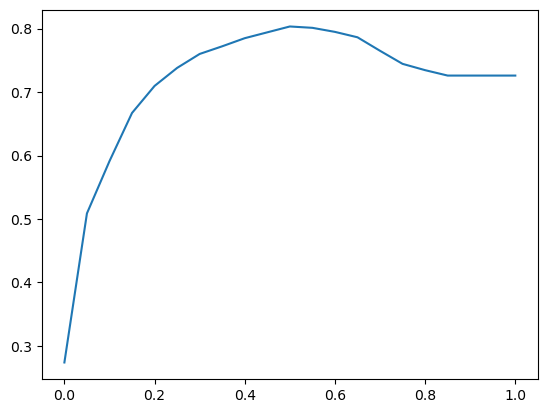

In [468]:
# Plot
plt.plot(thresholds, accuracies)

In [469]:
# -> Indicates 0.5 is the best 

In [470]:
# what's interesting. Customers are churning for > 1
# for 1 , if we can have a dummy model , we still get 73% .. our model trained is a mere 7% increase. 
# Accuracy isn't enough

In [471]:
from collections import Counter

In [472]:
Counter(y_pred >= 1)

Counter({np.False_: 1409})

In [473]:
# => Class imbalance: diagnosed with cancer.. accuracies can be quite misleading here..

# 4.3 Confusion table.

In [474]:
# Different types of errors and correct decisions

In [475]:
"""
True Positive: Positive Class (predicted) and correctly identified (actual)
False Positive: Positive Class (predicted) , but incorrectly identified (actual) => Incorrectly identified as a Positive Prediction Class
True Negative: Negative Class (predicted), correctly identified (actual) 
False Negative: Negative Class (predicted), incorrectly identified (actual) => Incorrectly identified as a Negative Prediction Class
"""

'\nTrue Positive: Positive Class (predicted) and correctly identified (actual)\nFalse Positive: Positive Class (predicted) , but incorrectly identified (actual) => Incorrectly identified as a Positive Prediction Class\nTrue Negative: Negative Class (predicted), correctly identified (actual) \nFalse Negative: Negative Class (predicted), incorrectly identified (actual) => Incorrectly identified as a Negative Prediction Class\n'

```
TP: y=1, g(x) >= t
TN: y=0, g(x) < t
FP: y=0, g(x) >= t
FN: y=1, g(x) < t
```

In [476]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [477]:
t = 0.5
predict_positive = y_pred >= t
predict_negative = y_pred < t

In [478]:
tp = (actual_positive & predict_positive).sum()
tn = (actual_negative & predict_negative).sum()
fp = (actual_negative & predict_positive).sum()
fn = (actual_positive & predict_negative).sum()

In [479]:
tp, tn, fp, fn

(np.int64(210), np.int64(922), np.int64(101), np.int64(176))

In [480]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[922, 101],
       [176, 210]])

In [481]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

In [482]:
# 4.4 Precision and Recall



In [483]:
acc = (tp + tn) / (tp + tn + fp + fn)
acc

np.float64(0.8034066713981547)

In [484]:
# Precision : interested in who are churning under the positive class. (fraction of positively predicted) . 
# Highlights how effective the discount provided was. 

In [485]:
precision = tp / (tp + fp)
precision

np.float64(0.6752411575562701)

In [486]:
# Recall : Interested only who are churning either in positive or negative.
# highlights how effective our model is to identify churners.
recall = tp / (tp + fn)
recall

np.float64(0.5440414507772021)

In [487]:
# Looking at precision and recall, our model isn't that good.


# 4.5 ROC Curves (Receiver Operating Characteristics)

In [488]:
# Radar  ==> Plane

In [489]:
tpr = tp / (tp + fn)
tpr # same as recall

np.float64(0.5440414507772021)

In [490]:
fpr = fp / (fp + tn)
fpr

np.float64(0.09872922776148582)

In [491]:
# idea is to minimize FPR and maximize TPR

In [492]:
thresholds = np.linspace(0, 1, 101)

scores = []
for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = y_pred >= t
    predict_negative = y_pred < t

    tp = (actual_positive & predict_positive).sum()
    tn = (actual_negative & predict_negative).sum()
    fp = (actual_negative & predict_positive).sum()
    fn = (actual_positive & predict_negative).sum()

    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)

    scores.append((t, tp, tn, fp, fn, tpr, fpr))
    

In [493]:
df_scores = pd.DataFrame(scores, columns=['t', 'tp', 'tn', 'fp', 'fn', 'tpr', 'fpr'])
df_scores[::10]

,t,tp,tn,fp,fn,tpr,fpr
0,0.0,386,0,1023,0,1.000000,1.000000
10,0.1,366,467,556,20,0.948187,0.543500
20,0.2,333,667,356,53,0.862694,0.347996
30,0.3,284,787,236,102,0.735751,0.230694
40,0.4,249,857,166,137,0.645078,0.162268
50,0.5,210,922,101,176,0.544041,0.098729
60,0.6,150,970,53,236,0.388601,0.051808
70,0.7,75,1003,20,311,0.194301,0.019550
80,0.8,13,1022,1,373,0.033679,0.000978
90,0.9,0,1023,0,386,0.000000,0.000000


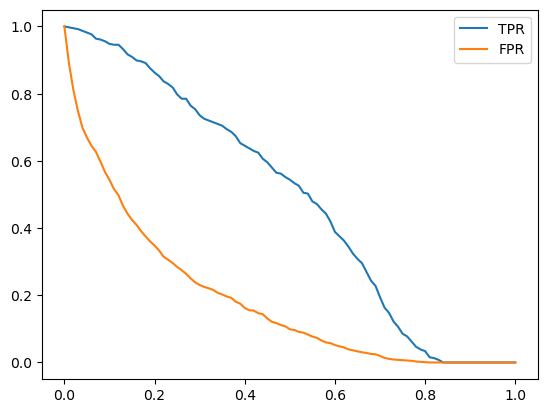

In [494]:
plt.plot(df_scores.t, df_scores['tpr'], label='TPR')
plt.plot(df_scores.t, df_scores['fpr'], label='FPR')
plt.legend()

#### Random Model

In [495]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [496]:
((y_rand >= 0.5) == y_val).mean()

np.float64(0.5017743080198722)

In [497]:
def get_tpr_fpr_df(y_val, y_pred):
    thresholds = np.linspace(0, 1, 101)
    
    scores = []
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
    
        predict_positive = y_pred >= t
        predict_negative = y_pred < t
    
        tp = (actual_positive & predict_positive).sum()
        tn = (actual_negative & predict_negative).sum()
        fp = (actual_negative & predict_positive).sum()
        fn = (actual_positive & predict_negative).sum()
    
        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
    
        scores.append((t, tp, tn, fp, fn, tpr, fpr))

    df_scores = pd.DataFrame(scores, columns=['t', 'tp', 'tn', 'fp', 'fn', 'tpr', 'fpr'])
    return df_scores

In [498]:
df_rand = get_tpr_fpr_df(y_val, y_rand)

In [499]:
df_rand[::10]

,t,tp,tn,fp,fn,tpr,fpr
0,0.0,386,0,1023,0,1.000000,1.000000
10,0.1,347,100,923,39,0.898964,0.902248
20,0.2,307,201,822,79,0.795337,0.803519
30,0.3,276,299,724,110,0.715026,0.707722
40,0.4,237,399,624,149,0.613990,0.609971
50,0.5,202,505,518,184,0.523316,0.506354
60,0.6,161,614,409,225,0.417098,0.399804
70,0.7,121,721,302,265,0.313472,0.295210
80,0.8,78,817,206,308,0.202073,0.201369
90,0.9,40,922,101,346,0.103627,0.098729


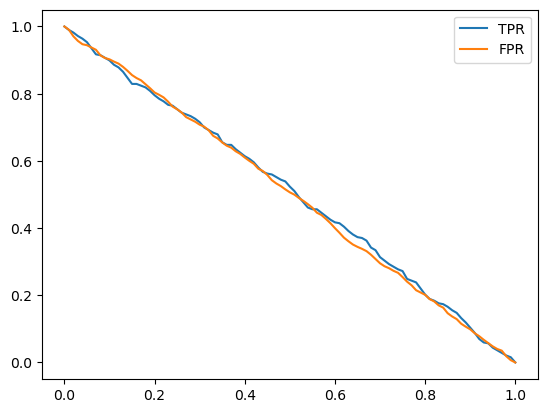

In [500]:
plt.plot(df_rand.t, df_rand['tpr'], label='TPR')
plt.plot(df_rand.t, df_rand['fpr'], label='FPR')
plt.legend()

#### Ideal Model

In [501]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(np.int64(1023), np.int64(386))

In [502]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [503]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

In [504]:
((y_ideal_pred > 0.726) == y_ideal).mean()

np.float64(1.0)

In [505]:
df_ideal = get_tpr_fpr_df(y_ideal, y_ideal_pred)

In [506]:
df_ideal[::10]

,t,tp,tn,fp,fn,tpr,fpr
0,0.0,386,0,1023,0,1.000000,1.000000
10,0.1,386,141,882,0,1.000000,0.862170
20,0.2,386,282,741,0,1.000000,0.724340
30,0.3,386,423,600,0,1.000000,0.586510
40,0.4,386,564,459,0,1.000000,0.448680
50,0.5,386,704,319,0,1.000000,0.311828
60,0.6,386,845,178,0,1.000000,0.173998
70,0.7,386,986,37,0,1.000000,0.036168
80,0.8,282,1023,0,104,0.730570,0.000000
90,0.9,141,1023,0,245,0.365285,0.000000


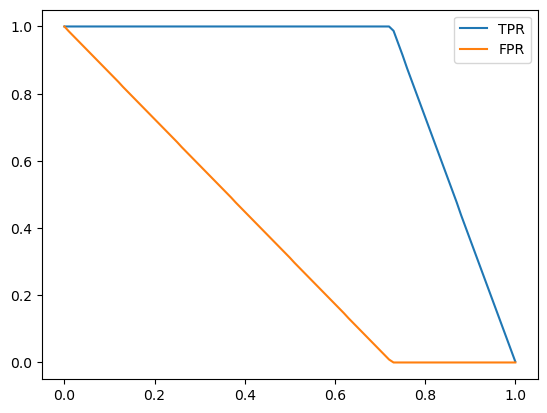

In [507]:
plt.plot(df_ideal.t, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.t, df_ideal['fpr'], label='FPR')
plt.legend()

### Putting everything together

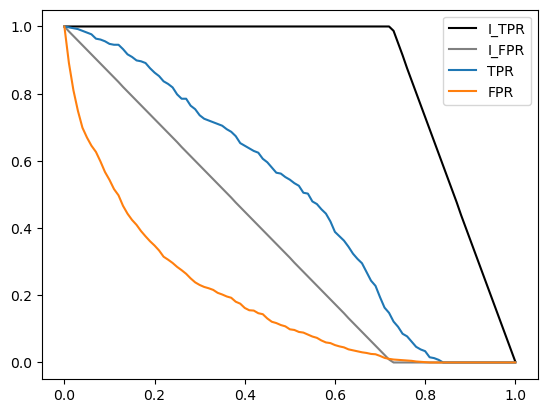

In [508]:
# plt.plot(df_rand.t, df_rand['tpr'], label='TPR')
# plt.plot(df_rand.t, df_rand['fpr'], label='FPR')

plt.plot(df_ideal.t, df_ideal['tpr'], label='I_TPR', color='black')
plt.plot(df_ideal.t, df_ideal['fpr'], label='I_FPR', color='gray')

plt.plot(df_scores.t, df_scores['tpr'], label='TPR')
plt.plot(df_scores.t, df_scores['fpr'], label='FPR')
plt.legend()

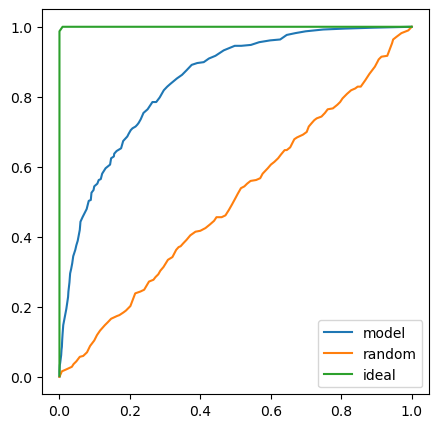

In [509]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot(df_rand.fpr, df_rand.tpr, label='random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')

plt.legend()

In [510]:
from sklearn.metrics import roc_curve

In [511]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

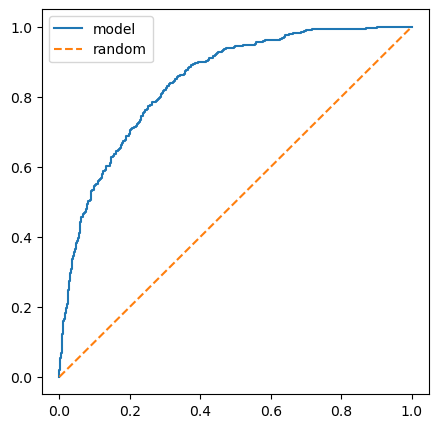

In [512]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='model')
plt.plot([0,1], [0,1], label='random', linestyle='--')

plt.legend()

# 4.6 Area under ROC

In [513]:
from sklearn.metrics import auc

In [514]:
auc(fpr, tpr)

np.float64(0.8438074544542871)

In [515]:
auc(df_scores.fpr, df_scores.tpr)

np.float64(0.8437542734718064)

In [516]:
auc(df_ideal.fpr, df_ideal.tpr)

np.float64(0.9999430203759136)

In [517]:
from sklearn.metrics import roc_auc_score


In [518]:
roc_auc_score(y_val, y_pred)

np.float64(0.8438074544542871)

In [519]:
# Auc tells us the prob of randomnly selected positive example has a higher score than negative example.

In [520]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [521]:
import random

In [522]:
n = 100000
success = 0

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)

    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1

success / n

0.84469

In [523]:
# numpy
n = 100000
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)


In [524]:
(pos[pos_ind] > neg[neg_ind]).mean()

np.float64(0.84299)

# 4.7 K-fold Cross Validation

In [525]:
# Evaluating the model on different subsets

In [526]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress only ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [527]:

def train(df_t, y, C=1.0):
    dicts = df_t[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_t = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_t, y)

    return dv, model

    

In [528]:
dv, model = train(df_train, y_train, C=10)

In [529]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X_val = dv.transform(dicts)
    y_pred = model.predict_proba(X_val)[:, 1]

    return y_pred

In [530]:
y_pred = predict(df_val, dv, model)

In [531]:
from sklearn.model_selection import KFold

In [532]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)


In [533]:
!pip install tqdm

113995.70s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [534]:
from tqdm.auto import tqdm

In [535]:
scores = []

# trap the loop to check how long ?

for train_idx, val_idx in tqdm(kfold.split(df_full_train)):

    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = y_full_train.iloc[train_idx].values
    y_val = y_full_train.iloc[val_idx].values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)
    

0it [00:00, ?it/s]

In [536]:
scores

[np.float64(0.8498163255569868),
 np.float64(0.8423731435643564),
 np.float64(0.8584123714765046),
 np.float64(0.8333388198502181),
 np.float64(0.8245502481389578),
 np.float64(0.8413253413253413),
 np.float64(0.8431618365353304),
 np.float64(0.8255455407969641),
 np.float64(0.8458574181117534),
 np.float64(0.8614668414507076)]

In [537]:
print(f"Mean AUC Score with std dev: {np.mean(scores):.3f} +- {np.std(scores):.3f}")

Mean AUC Score with std dev: 0.843 +- 0.012


In [538]:
n_splits = 5

for C in tqdm([.001, .01, .1, .5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []
    
    for train_idx, val_idx in kfold.split(df_full_train):
    
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = y_full_train.iloc[train_idx].values
        y_val = y_full_train.iloc[val_idx].values
    
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
    
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print(f"C = {C} AUC : {np.mean(scores):.4f} {np.std(scores):.4f}")
    

  0%|          | 0/7 [00:00<?, ?it/s]

C = 0.001 AUC : 0.8251 0.0093
C = 0.01 AUC : 0.8400 0.0083
C = 0.1 AUC : 0.8418 0.0073
C = 0.5 AUC : 0.8420 0.0069
C = 1 AUC : 0.8419 0.0069
C = 5 AUC : 0.8420 0.0069
C = 10 AUC : 0.8419 0.0069


In [539]:
# C=1.0 good enough

In [540]:
scores

[np.float64(0.8446672056895699),
 np.float64(0.8451301979870216),
 np.float64(0.8333253060405379),
 np.float64(0.8348088667903051),
 np.float64(0.8517304132283268)]

In [541]:
len(y_full_train), len(df_full_train)

(5634, 5634)

In [542]:
dv, model = train(df_full_train, y_full_train.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

np.float64(0.858357166845418)